In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Preprocess the data

In [41]:
df=pd.read_csv('Zoo.csv')
df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [27]:
df.shape

(101, 18)

In [28]:
df.columns.tolist()

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [29]:
df.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [30]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
print(df.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [42]:
#drop the 'animal name' column as it is not useful for prediction
df.drop('animal name',axis=1,inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [45]:
features= df.drop('type',axis=1)
target = df['type']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.3, random_state=42)

In [49]:
x_train = np.ascontiguousarray(x_train)
x_test = np.ascontiguousarray(x_test)
y_train = np.ascontiguousarray(y_train)
y_test = np.ascontiguousarray(y_test)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred = knn.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import KFold

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8709677419354839

In [55]:
classification_rep = classification_report(y_test, y_pred)
classification_rep

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.97        15\n           1       1.00      1.00      1.00         3\n           2       0.00      0.00      0.00         1\n           3       0.50      1.00      0.67         2\n           4       1.00      0.50      0.67         2\n           5       0.83      1.00      0.91         5\n           6       1.00      0.67      0.80         3\n\n    accuracy                           0.87        31\n   macro avg       0.76      0.73      0.72        31\nweighted avg       0.91      0.87      0.87        31\n'

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[14,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]])

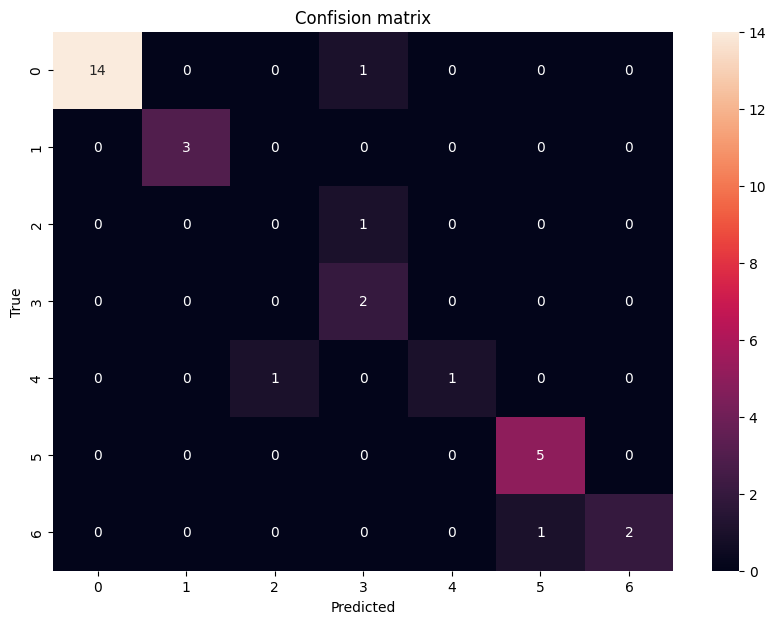

In [57]:
#visualization
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confision matrix')
plt.show()

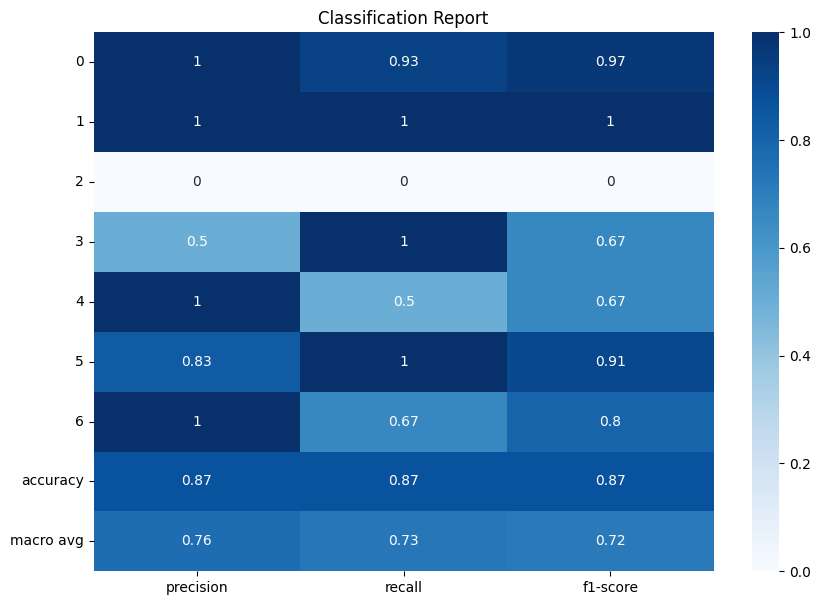

In [58]:
report_data = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()
plt.figure(figsize=(10,7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

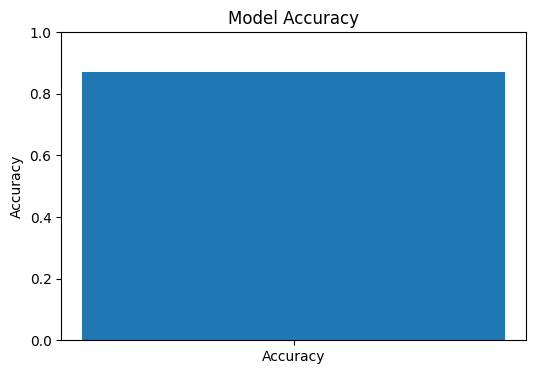

In [59]:
#plotting accuracy
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'],[accuracy])
plt.ylim(0,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Interview Questions:

#### 1. What are the key hyperparameters in KNN?

A k-nearest neighbors is algorithm used for classification and regression. It classifies a new data point by finding the k-nearest points in the training dataset and assigns it the majority class among those neighbors.
Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset. Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices. Hyperparameter tuning in k-nearest neighbors (KNN) is important because it allows us to optimize the performance of the model. The KNN algorithm has several hyperparameters that can significantly affect the accuracy of the model, such as the number of nearest neighbors to consider (k), the distance metric used to measure similarity, and the weighting scheme used to aggregate the labels of the nearest neighbors.

#### 2. What distance metrics can be used in KNN?

1 Euclidean distance
2 Manhattan distance
3 Minkowski distance
4 Cosine similarity

How to choose the best distance metric

When selecting a distance metric to optimize your KNN algorithm, there is no one-size-fits-all solution. However, you can use some general guidelines to help you make the best choice. Analyzing your data and understanding the type, scale, range, and distribution of your features is essential. Experimenting with different distance metrics and comparing their results and performance on your data and problem is also key. Cross-validation and other evaluation methods can help measure the accuracy and quality of your KNN algorithm with different distance metrics. Additionally, consider the computational complexity and interpretability of the distance metrics, as well as how they affect your KNN algorithm. Lastly, try to use domain knowledge and intuition to select a distance metric that makes sense for your data and problem.